In [67]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [69]:
income_data = pd.read_csv("MEHOINUSA672N.csv")
home_value_data = pd.read_csv("average_oregon_home_value_timeseries.csv")

print(income_data.head())
print(home_value_data.head())

  observation_date  MEHOINUSA672N
0       1984-01-01          58930
1       1985-01-01          60050
2       1986-01-01          62280
3       1987-01-01          63060
4       1988-01-01          63530
         Date  Average Home Value Index
0  2000-01-31                 149959.90
1  2000-02-29                 150222.07
2  2000-03-31                 150173.50
3  2000-04-30                 150728.96
4  2000-05-31                 151300.02


In [71]:
# rename columns
income_data = income_data.rename(columns={"observation_date": "date", "MEHOINUSA672N": "income"})
home_value_data = home_value_data.rename(columns={"Date": "date", "Average Home Value Index": "value"})

# modify dates to datetime
income_data["date"] = pd.to_datetime(income_data["date"])
home_value_data["date"] = pd.to_datetime(home_value_data["date"])

# set cutoff date
cutoff_date = pd.to_datetime('1999-01-31')

# only keep records after set cutoff date
current_income_data = income_data[income_data['date'] >= cutoff_date].copy()

print(current_income_data.head())
print(home_value_data.head())

         date  income
16 2000-01-01   70020
17 2001-01-01   68870
18 2002-01-01   68310
19 2003-01-01   68350
20 2004-01-01   68250
        date      value
0 2000-01-31  149959.90
1 2000-02-29  150222.07
2 2000-03-31  150173.50
3 2000-04-30  150728.96
4 2000-05-31  151300.02


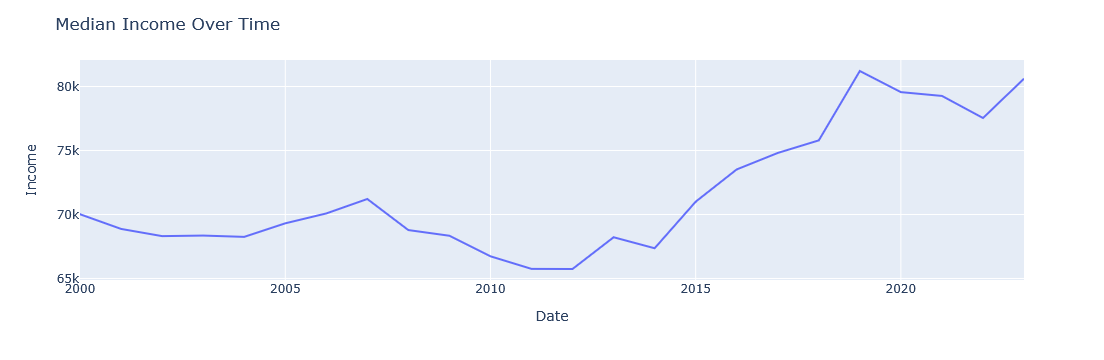

In [73]:
plot = px.line(current_income_data, x="date", y="income")
plot.update_layout(
    title="Median Income Over Time",
    xaxis_title="Date",
    yaxis_title="Income",
    )
plot.show()

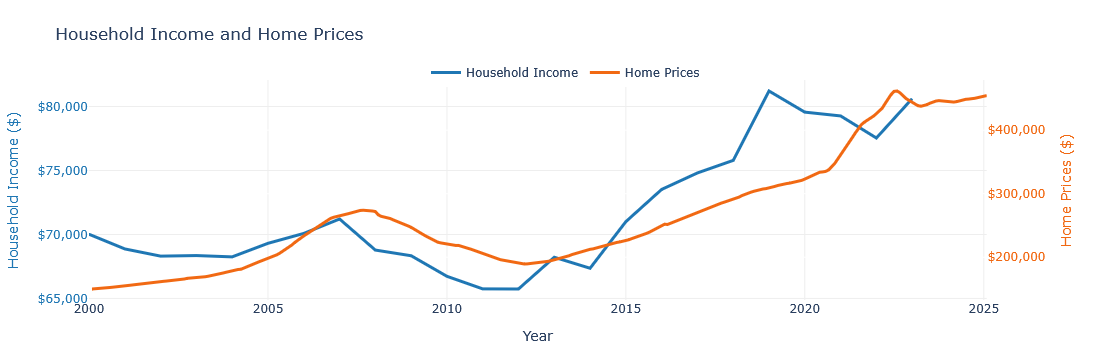

In [79]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Household Income trace (left y-axis)
fig.add_trace(
    go.Scatter(
        x=current_income_data['date'],
        y=current_income_data['income'],
        name='Household Income',
        line=dict(color='#1f77b4', width=3)
    ),
    secondary_y=False
)

# Add Home Prices trace (right y-axis)
fig.add_trace(
    go.Scatter(
        x=home_value_data['date'],
        y=home_value_data['value'],
        name='Home Prices',
        line=dict(color='#f16913', width=3)
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title='Household Income and Home Prices',
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(orientation='h', y=1.1, x=0.5, xanchor='center'),
    margin=dict(l=60, r=60, t=80, b=60),
    hovermode='x unified'
)

# Set y-axes titles
fig.update_yaxes(
    title_text='Household Income ($)',
    title_font=dict(color='#1f77b4'),
    tickfont=dict(color='#1f77b4'),
    tickformat='$,.0f',
    secondary_y=False,
    gridcolor='#EEEEEE'
)

fig.update_yaxes(
    title_text='Home Prices ($)',
    title_font=dict(color='#f16913'),
    tickfont=dict(color='#f16913'),
    tickformat='$,.0f',
    secondary_y=True
)

# Update x-axis
fig.update_xaxes(
    title_text='Year',
    showgrid=True,
    gridcolor='#EEEEEE'
)

# Show the plot
fig.show()